# Analysis of Movielens Dataset

<img src="pic.png">

This dataset (ml-20m) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files, genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at http://grouplens.org/datasets/.

# **Data Ingestion**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
movies = pd.read_csv('movies.csv', sep=',')
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.drop([22368, 22669, 22679, 15646, 17341, 19859],inplace = True)
movies.dropna(inplace = True)
movies.head(3)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


# What is the most popular movie ?

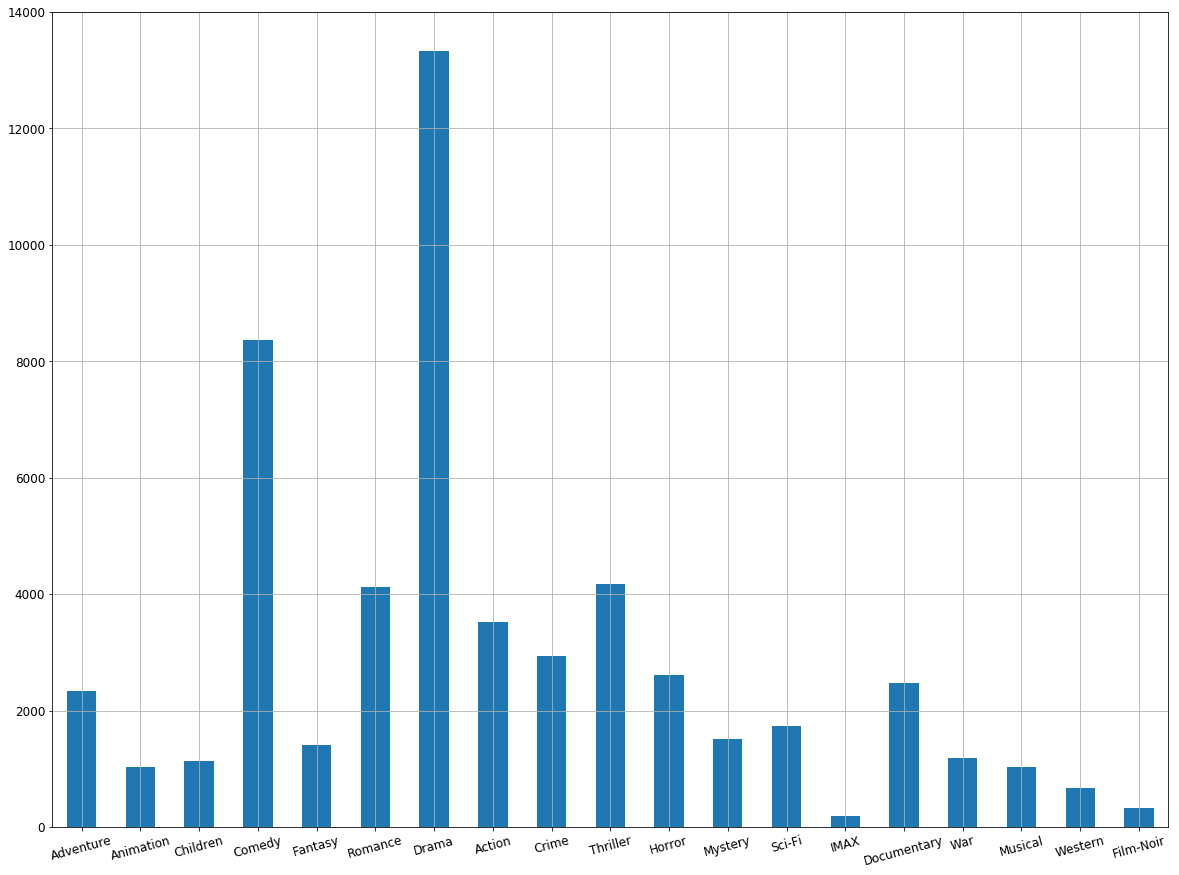

In [3]:
genres = ['Adventure','Animation','Children','Comedy','Fantasy','Romance','Drama',
          'Action','Crime','Thriller','Horror','Mystery','Sci-Fi','IMAX','Documentary',
          'War','Musical','Western','Film-Noir']
count = [len(movies[movies['genres'].str.contains(genre)]) for genre in genres]
genres_dict = {k:v for k,v in zip(genres,count)}
dataframe = pd.DataFrame.from_dict(genres_dict,orient = 'index')
dataframe

dataframe.plot(grid = True,kind ='bar', figsize =(20,15),fontsize= 12,rot = 15,
               legend =False)

We can clearly see that the most popular genre is drama and comedy

# Does movie reflect events in the real world ?

In [4]:
years = movies['year'].unique()
count = []
for year in years:    
    for genre in genres:
        value = len(movies[(movies['genres'].str.contains(genre)) & 
                           (movies['year'] == year)])
        count.append(value)

chunks = [count[x:x+19] for x in range(0, len(count), 19)]
new_data = {k:v for k,v in zip(years,chunks)}

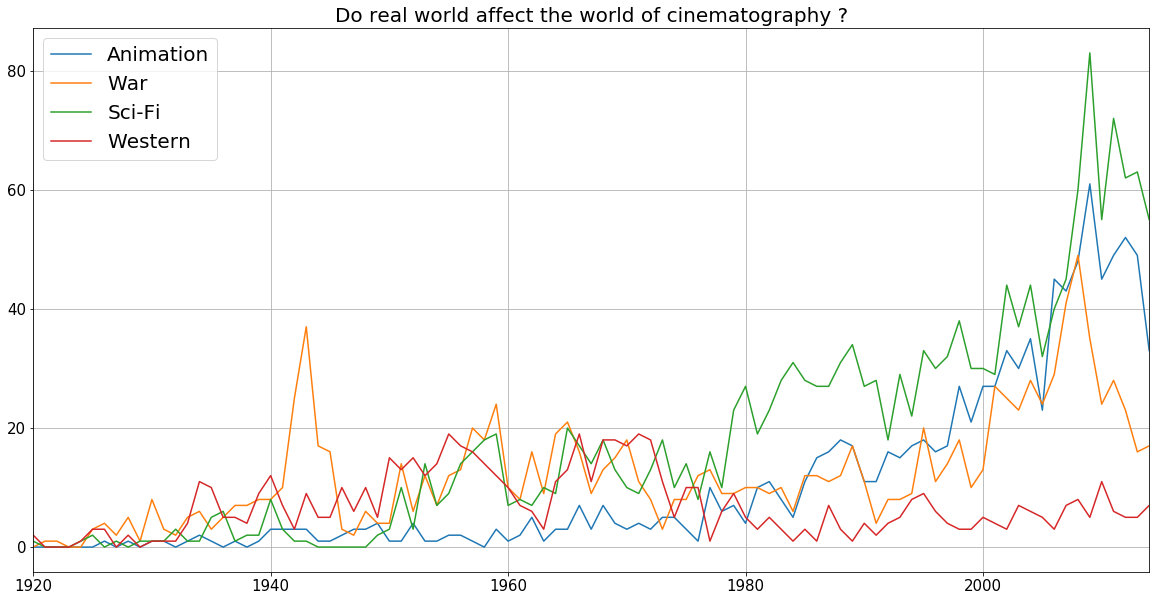

In [5]:
new = pd.DataFrame.from_dict(new_data, orient = 'index')
new.columns = genres
new = pd.DataFrame.sort_index(new)
new = new[['Animation','War','Sci-Fi','Western']].loc['1920':'2014']

plt.figure(dpi = 100)
fig = new.plot(grid = True,kind = 'line',figsize = (20,10), fontsize= 15)
plt.title('Do real world affect the world of cinematography ?',fontsize= 20)
plt.legend(fontsize = 20)
plt.savefig('findings.png')

We can notice a rapid growth of sci-fi movies shortly after 1969, the year of the first Moon landing. Sci-Fi continues to explode in popularity due to the improvement in CGI and special effects in movies. Secondly, between 1930s and 1960s there is a huge number of western movies which align with the timeline when westerns popularity was peaking. Next, after the growth of personal computer and the computer generated graphic emerged we can see the rise of popularity of animated movies. War movies were popular around the time when big military conflicts occured - World War II, Vietnam War and most recently War in Afghanistan and Iraq. Therefore we can conclude that the world of cinematography reflect events in the real world.

# How many movies were produced per year?

In [6]:
year_produced = movies.groupby(by ='year').count()
year_produced.drop(['2015'],inplace = True)
year_produced = year_produced[year_produced['title'] >= 5]

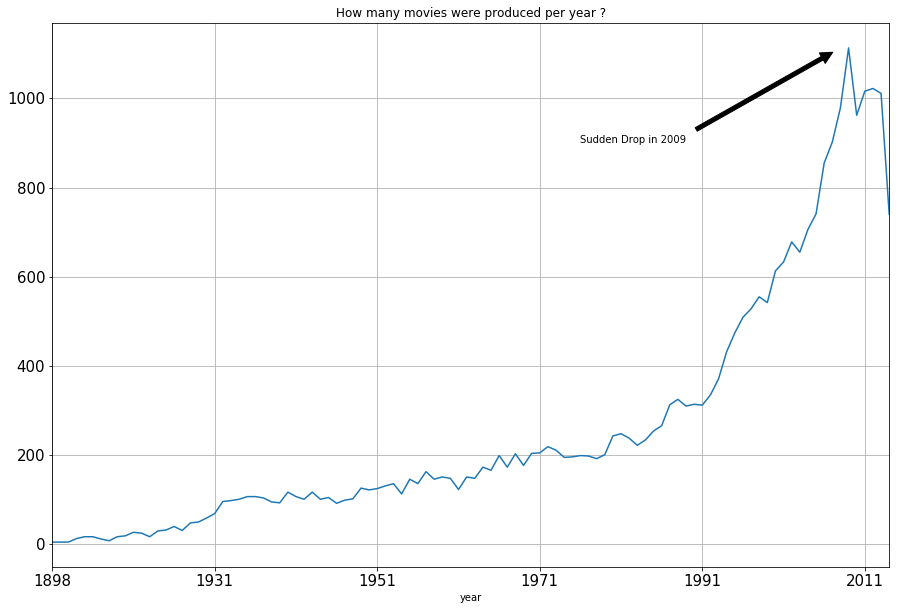

In [7]:
ax = year_produced['title'].plot(grid = True, figsize = (15,10),
                                 title = 'How many movies were produced per year ?',
                                 fontsize= 15)
ax.annotate('Sudden Drop in 2009', xy=(97, 1113), xytext=(65, 900),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

In [8]:
ratings = pd.read_csv('ratings.csv', sep=',', parse_dates=['timestamp'])
del ratings['userId']
ratings.head(3)

,movieId,rating,timestamp
0,2,3.5,1112486027
1,29,3.5,1112484676
2,32,3.5,1112484819


# Top 8 movies  with the highest rating?

In [9]:
data = pd.merge(movies,ratings,on = 'movieId' )
most_rated = data['title'].value_counts()[:10]
fix_movies = most_rated[most_rated >= 30]
movie_stats = data.groupby('title').agg({'rating': [np.size,np.mean]})
movie_stats.head()

rating          
                                                     size      mean
title                                                              
"Great Performances" Cats (1998)                    155.0  2.748387
#chicagoGirl: The Social Network Takes on a Dic...    3.0  3.666667
$ (Dollars) (1971)                                   24.0  2.833333
$5 a Day (2008)                                      39.0  2.871795
$9.99 (2008)                                         55.0  3.009091

In [10]:
# sort by rating average
rating_average = movie_stats[movie_stats['rating']['size'] >= 100].sort_values([('rating', 'mean')], ascending=False)
rating_average.head()

rating          
                                     size      mean
title                                              
Shawshank Redemption, The (1994)  63366.0  4.446990
Godfather, The (1972)             41355.0  4.364732
Usual Suspects, The (1995)        47006.0  4.334372
Schindler's List (1993)           50054.0  4.310175
Godfather: Part II, The (1974)    27398.0  4.275641

In [11]:
rating_average[:5]

rating          
                                     size      mean
title                                              
Shawshank Redemption, The (1994)  63366.0  4.446990
Godfather, The (1972)             41355.0  4.364732
Usual Suspects, The (1995)        47006.0  4.334372
Schindler's List (1993)           50054.0  4.310175
Godfather: Part II, The (1974)    27398.0  4.275641

In [12]:
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
label = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000',
         '30000-35000','35000-40000','40000-45000','45000-50000','50000-55000',
         '55000-60000','60000-65000']
rating_average['rating group'] = pd.cut(rating_average['rating']['mean'], range(0,6), 
                                        right=True, labels= labels)
rating_average['Number of vote'] = pd.cut(rating_average['rating']['size'], 
                                          range(0,65001,5000), right=True,labels= label,
                                          include_lowest = True)

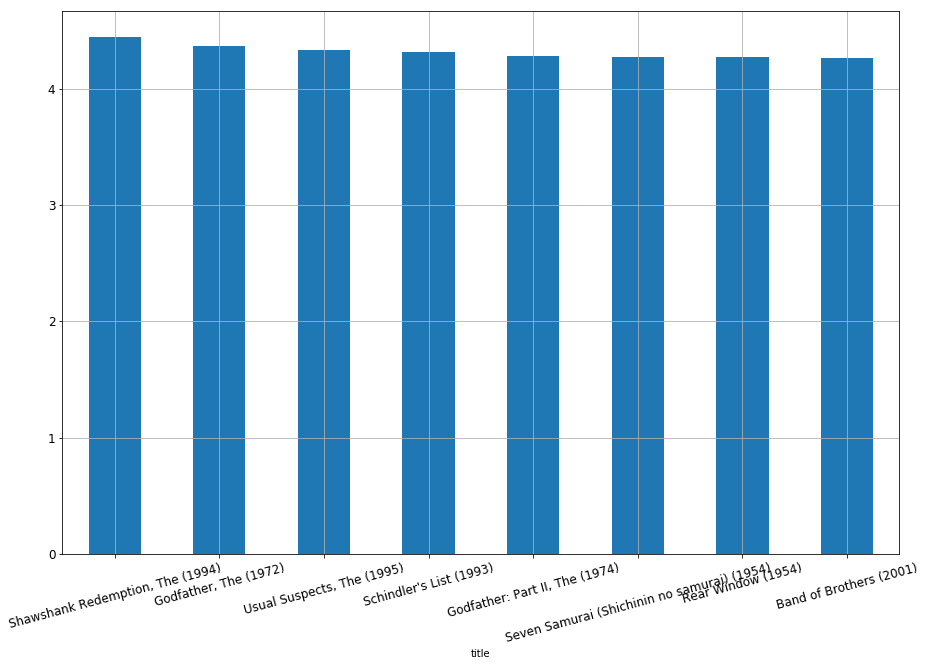

In [13]:
rating_average['rating']['mean'][:8].plot(grid = True,kind = 'bar', figsize = (15,10),
                                          fontsize= 12, rot = 15,legend = False)

# How is the ratings distributed?

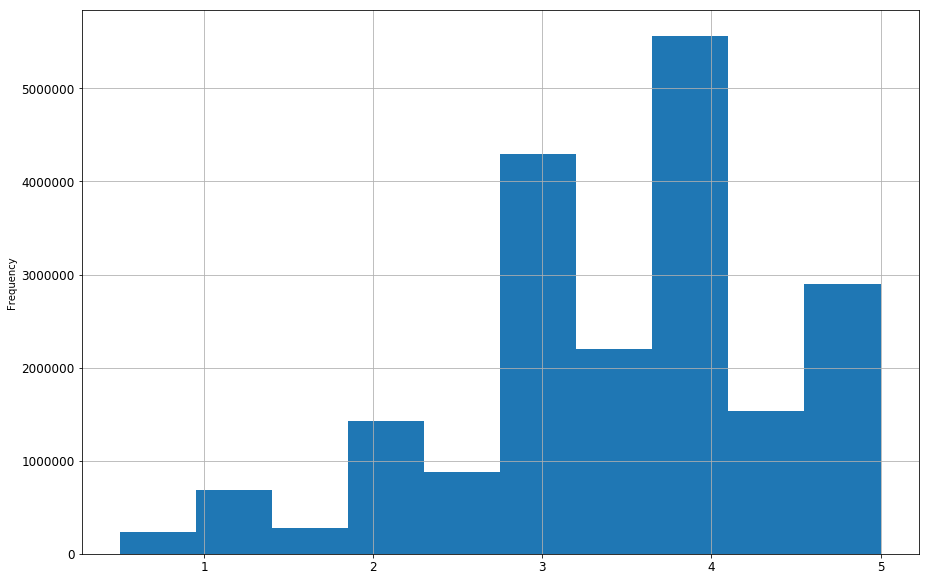

In [14]:
ratings['rating'].plot(grid = True,kind = 'hist', figsize = (15,10), fontsize= 12,
                       legend = False)

It seems that middling rating is much more usual than low and high rating which is expected. People don't usually go out and rate movies they are dissapointed with. We'll find out below.

# Connection between the number of rating and the perceived quality of the movie

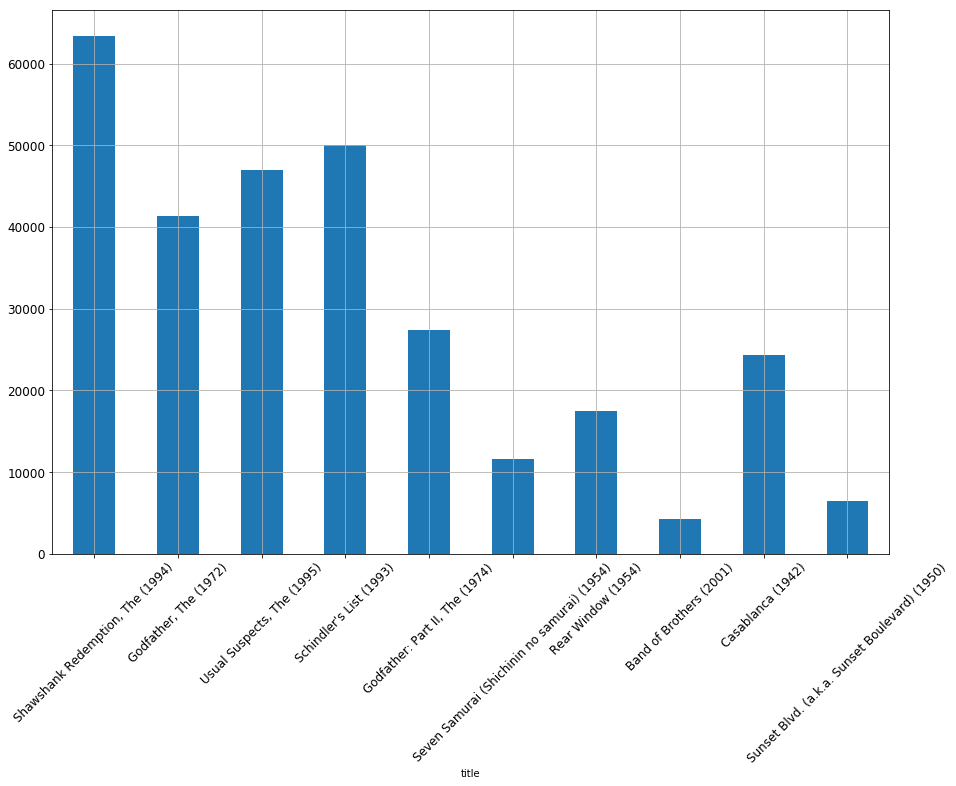

In [15]:
rating_average['rating']['mean'][:10].plot(grid = True,kind = 'bar', figsize = (15,10),
                                           rot = 45,fontsize= 12,legend = False)
rating_average['rating']['size'][:10].plot(grid = True,kind = 'bar', figsize = (15,10),
                                           rot = 45, fontsize= 12,legend = False)

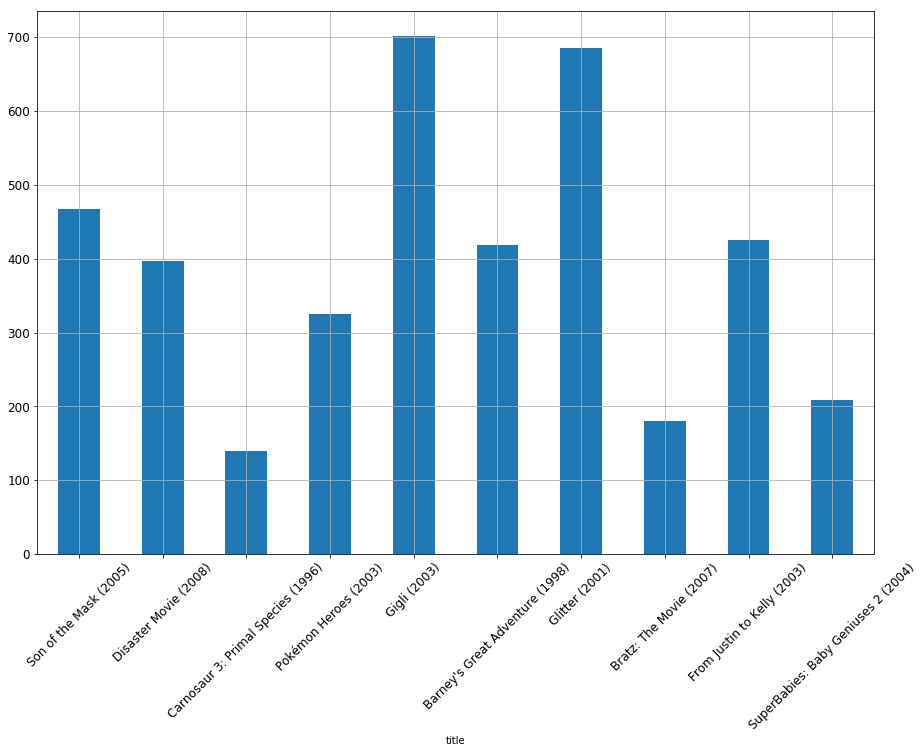

In [16]:
rating_average['rating']['mean'][-10:].plot(grid = True,kind = 'bar', figsize = (15,10),
                                            rot =45,fontsize= 12,legend = False)
rating_average['rating']['size'][-10:].plot(grid = True,kind = 'bar', figsize = (15,10),
                                            rot = 45,fontsize= 12,legend = False)

It seems that my hypothesis above is true. Movies with lower rating are also being rated less.